In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


train_data_dir = 'train_data'  
labels_csv = 'labels.csv'  

from sklearn.model_selection import train_test_split


In [2]:
from os import listdir  # Import for working with directories 

# Split data directory into training and testing sets (ratio: 80% training, 20% testing)
train_dir, test_dir = train_test_split(os.listdir(train_data_dir), test_size=0.2, random_state=42)

# Create new paths for training and testing data directories
train_data_dir = os.path.join(train_data_dir, *train_dir)  # Join path components
test_data_dir = os.path.join(train_data_dir, *test_dir)


In [4]:
# Define data generators with separate directories
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

img_width = 100
img_height = 100

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=100,
    class_mode='categorical',
    seed=42,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=100, 
    class_mode='categorical',
    shuffle=False 
)



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train_data\\label_0\\label_7\\label_2\\label_4\\label_3\\label_6'

In [3]:
# Get class labels from CSV (optional)
if os.path.exists(labels_csv):
    label_df = pd.read_csv(labels_csv)
    label_map = dict(zip(label_df['label_id'], label_df['label_name']))
    num_classes = len(label_map)
else:
    # If no CSV, assume number of classes matches the number of subfolders
    num_classes = len(os.listdir(train_data_dir))


In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define a callback to capture training history
history = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)

# Compile the model with the callback
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, steps_per_epoch = 25, callbacks=[history])
# Evaluate CNN model
test_loss, test_acc = model.evaluate(train_generator)
print("CNN Accuracy:", test_acc)

c:\Users\kaush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


c:\Users\kaush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 378ms/step - accuracy: 0.7276 - loss: 0.9895
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.8576 - loss: 0.6073
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.8558 - loss: 0.5909
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.8637 - loss: 0.5572
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 0.8614 - loss: 0.5628
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.8670 - loss: 0.5154
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.8642 - loss: 0.5095
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.8768 - loss: 0.4743
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.8800 - loss: 0.4525
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.8706 - loss: 0.4929
291/291 ━━━━━━━━━━━━━━━━━━━━ 65s 223ms/step - accuracy: 0.8752 - loss: 0.4703
CNN Accuracy: 0.877659022808075


In [13]:
import cv2
import numpy as np  # Import NumPy for array operations

def preprocess_image(img, img_height, img_width):
  """Resizes and normalizes an image for the CNN model."""
  img = cv2.resize(img, (img_height, img_width))
  img = img.astype('float32') / 255.0
  return img

# Assuming you have loaded your trained CNN model (cnn_model)
test_img = cv2.imread("crater (2).jpg")

# Resize the image to match your CNN model's input dimensions
test_img = cv2.resize(test_img, (img_height, img_width))

# Preprocess the test image for CNN prediction
test_img_preprocessed = preprocess_image(test_img.copy(), img_height, img_width)

# Predict landform class using your trained CNN model
predicted_class = model.predict(np.expand_dims(test_img_preprocessed, axis=0)).argmax(axis=-1)[0]

# Print the predicted landform class
print(f"Predicted Landform Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Landform Class: 0


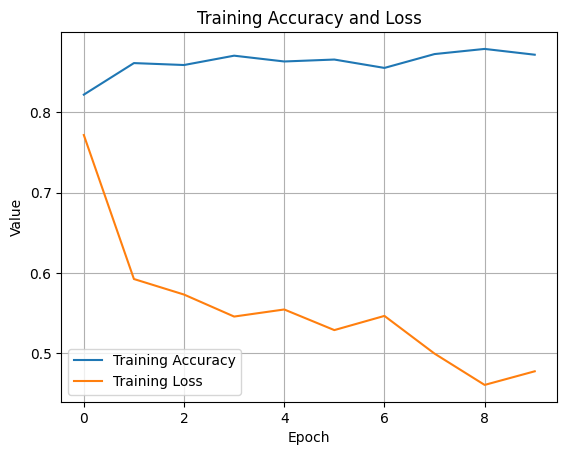

In [15]:
import matplotlib.pyplot as plt

# Assuming you have your training history stored in a variable named 'history'

# Plot training accuracy and loss (assuming no validation split)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')  # Loss instead of validation loss
plt.title('Training Accuracy and Loss')
plt.ylabel('Value')  # Generic label as there's no validation
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()



In [17]:
import cv2
from sklearn.svm import SVC
from skimage.feature import local_binary_pattern, hog

def preprocess_image(img, img_height, img_width):
  # Resize and normalize the image
  img = cv2.resize(img, (img_height, img_width))
  img = img.astype('float32') / 255.0
  return img

# Function to extract features based on predicted landform class
def extract_features(img, landform_class):
  if landform_class == "crater":  # Example features for crater
    features = cv2.Laplacian(img, cv2.CV_64F).flatten()  # Height variation
    features = np.concatenate((features, cv2.HuMoments(cv2.moments(img)).flatten()))  # Circularity
    features = np.concatenate((features, local_binary_pattern(img, n_points=8, radius=1).flatten()))  # Texture
  # Modify feature extraction based on other landform classes
  return features

test_img = cv2.imread("crater (2).jpg")

# Resize the image to match your CNN model's input dimensions
test_img = cv2.resize(test_img, (img_height, img_width))

# Preprocess the test image for CNN prediction
test_img_preprocessed = preprocess_image(test_img, img_height, img_width)

# Predict landform class using your trained CNN model
predicted_class = model.predict(np.expand_dims(test_img_preprocessed, axis=0)).argmax(axis=-1)[0]
# Feature extraction for segmentation based on predicted class
features = extract_features(test_img, predicted_class)

# Train the kernel SVM (replace with your training data)
svc_model = SVC(kernel='rbf')  # You might need to tune kernel parameters
svc_model.fit(np.array([features for _ in train_data_dir]), labels_csv)

# Extract features from the test image
test_img_features = extract_features(test_img, predicted_class)

# Segment the test image using the trained SVM
segmented_img = svc_model.predict(np.expand_dims(test_img_features, axis=0)).reshape(test_img.shape[:2])

# Colorize the segmentation mask (modify colors as needed)
color_map = {0: (0, 0, 0),  # Background (black)
              1: (0, 255, 0)}  # Landform (green)
segmented_color = cv2.cvtColor(segmented_img, cv2.COLOR_GRAY2BGR)
for i in range(segmented_img.shape[0]):
  for j in range(segmented_img.shape[1]):
    segmented_color[i, j] = color_map[segmented_img[i, j]]

# Overlay segmentation on the original image with transparency
alpha = 0.5  # Adjust transparency as desired
overlayed_img = cv2.addWeighted(test_img, 1 - alpha, segmented_color, alpha, 0)

# Display results (modify window names as needed)
cv2.imshow("Original Image", test_img)
cv2.imshow("Segmented Landform (Green)", segmented_color)
cv2.imshow("Overlayed Image (Transparent Segmentation)", overlayed_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(f"Predicted Landform Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


UnboundLocalError: cannot access local variable 'features' where it is not associated with a value

In [ ]:
test_img = cv2.imread("c_&_a.jpg")
print("Image shape:", test_img.shape)


Image shape: (2845, 2048, 3)
